## <span style="color:green"> Notebook - Material Class </span>
<span style="color:purple">Sinan Ozaydin, School of Geosciences, The University of Sydney, NSW 2006, Australia <br/> </span>
<span style="color:purple">sinan.ozaydin@protonmail.com</span>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In this notebook, we will learn how to use the material class in pide library. 

Material is an object that can be constructed in *pide* that can be used to define a compositional environment. A user might want to define a material rather than defining the parameters on a *pide* object because they might want to streamline a calculation or append these materials into *model* class to use the other functionalities exist in pide, such as 3D model conversion. First, we have to import neccesary 

In [2]:
from pide.material import Material

Now, we can define a material. For our purposes let's try to create a simple material made of granite.

In [3]:
Granite_Material = Material(name = 'Granite', calculation_type = 'rock', composition = {'granite':1.0},
							   el_cond_selections = {'granite': 10},solid_phase_mixing_idx = 1)

Here, we defined the 'Granite_Material' where the electrical conductivity calculation will be carried out as 'rock' method, completely made out of granite, use electrical conductivity selection as the 10th index, use Hashin-Shtrikman Lower Bound to calculate the mixture. Using this material, now let's calculate electrical conductivity and seismic velocities at the given temperature and pressure.

[Text(0, 400.0, ''),
 Text(0, 600.0, ''),
 Text(0, 800.0, ''),
 Text(0, 1000.0, ''),
 Text(0, 1200.0, ''),
 Text(0, 1400.0, ''),
 Text(0, 1600.0, ''),
 Text(0, 1800.0, '')]

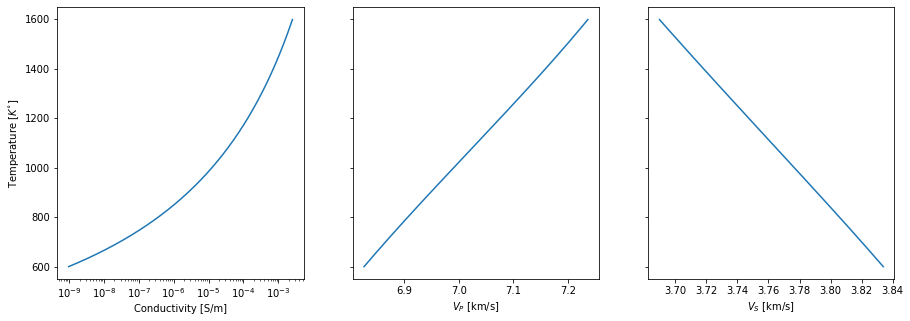

In [11]:
temp = np.arange(600,1600)
p = np.ones(len(temp)) * 3.0
cond = Granite_Material.calculate_conductivity(T = temp, P = p)
v_bulk, v_p, v_s = Granite_Material.calculate_seismic_velocity(T = temp, P = p)

fig = plt.figure(figsize = (15,5))
ax1 = plt.subplot(131)
ax2 = plt.subplot(132)
ax3 = plt.subplot(133)

ax1.plot(cond,temp)
ax2.plot(v_p,temp)
ax3.plot(v_s,temp)

ax1.set_xscale('log')

ax1.set_ylabel('Temperature [$K^{\circ}$]')
ax1.set_xlabel('Conductivity [S/m]')
ax2.set_xlabel('$V_P$ [km/s]')
ax3.set_xlabel('$V_S$ [km/s]')

ax2.set_yticklabels([])
ax3.set_yticklabels([])